In [1]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import re 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

You are using pip version 9.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
df1=pd.read_csv('oda-like_flows.csv')
df1.head()

,project_id,project_location_id,precision_code,geoname_id,place_name,latitude,longitude,location_type_code,location_type_name,gazetteer_adm_code,...,loan_type,interest_rate,maturity,grace_period,grant_element,location_details,contacts,source_triangulation,field_completeness,round_coded
0,968,968_2572183,4,2572183,Brazzaville,-4.26570,15.28048,ADM1,first-order administrative division,6295630|6255146|CG|12,...,NaN,NaN,NaN,NaN,NaN,Brazzaville suburbs,NaN,6,8,AdditionalCoded
1,981,981_2367237,4,2367237,Centrale,8.66667,1.00000,ADM1,first-order administrative division,6295630|6255146|TG|22,...,NaN,NaN,NaN,NaN,NaN,"Centrale, Kara",NaN,6,6,AdditionalCoded
2,981,981_2597439,4,2597439,Kara,9.66667,0.91667,ADM1,first-order administrative division,6295630|6255146|TG|23,...,NaN,NaN,NaN,NaN,NaN,"Centrale, Kara",NaN,6,6,AdditionalCoded
3,30730,30730_8394435,4,8394435,Eastern Darfur,11.16667,26.50000,ADM1,first-order administrative division,6295630|6255146|SD|60,...,NaN,NaN,NaN,NaN,NaN,"Ed Daein, East Darfur","Wali Alagib Kabur, acting governor of the East...",4,8,AdditionalCoded
4,30822,30822_3348310,4,3348310,Huambo,-12.50000,15.66667,ADM1,first-order administrative division,6295630|6255146|AO|08,...,NaN,NaN,NaN,NaN,NaN,Huambo,"Gao Kexiang, Chinese Ambassador ; Geoges Rebel...",5,6,AdditionalCoded


In [3]:
df1['recipients'].value_counts().head(7)

Tanzania    299
Cambodia    226
Zimbabwe    131
Zambia      127
Kenya       123
Pakistan    122
Ghana       106
Name: recipients, dtype: int64

In [4]:
df1['status'].value_counts()

Completion        3445
Implementation     870
Name: status, dtype: int64

In [5]:
df1['ad_sector_names'].value_counts().head(5)

Health                          866
Transport and Storage           567
Government and Civil Society    474
Emergency Response              458
Education                       439
Name: ad_sector_names, dtype: int64

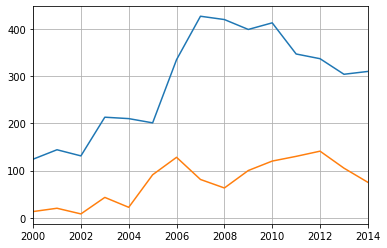

In [6]:
ax = df1['year'].value_counts().sort_index().plot()
df2=pd.read_csv('oof-like_flows.csv')
df2['year'].value_counts().sort_index().plot(ax=ax,grid=True)
# plt.savefig('compareyear.pdf')
plt.savefig('compareyear.svg')

In [12]:
df1['funding_agency'].value_counts().head(10)

Unspecified Chinese Government Institution, Government Agency                                                          3396
Export-Import Bank of China, Government Agency                                                                          724
Chinese Embassy/Consulate, Government Agency                                                                             87
China Ministry of Commerce, Government Agency                                                                            20
Industrial and Commercial Bank of China (ICBC), State-Owned Company; Export-Import Bank of China, Government Agency      10
People's Liberation Army of China, Government Agency                                                                      7
China Center for Disease Control and Prevention (China-CDC), Government Agency                                            7
Gansu Natural Energy Research Institute (GNERI), Academic, Training and Research                                          7
China Mi

In [14]:
df1['implementing_agency'].value_counts().head(10)

Huawei Technologies Co., Ltd., Private Sector                                                                                                                   109
International Telecommunication Construction Corporation (CITCC), State-Owned Company; China Communications Construction Company (CCCC), State-Owned Company     87
China Road & Bridge Corporation (CRBC), State-Owned Company                                                                                                      67
China Civil Engineering Construction Corporation (CCECC), State-Owned Company                                                                                    55
International Telecommunication Construction Corporation (CITCC), State-Owned Company; China Comservice International, State-Owned Company                       45
Shanghai Construction Group General Co., State-Owned Company                                                                                                     22
Tebian Electric 